# **Over View**

It's a major task for Machine Vision course 2022

second milestone : CNN classifier:
Use TensorFlow to build a CNN network and train it to classify images.

# **Import Libraries**

In [ ]:
# Importing required libraries
import keras
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense, Input, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D



169001437/169001437 [==============================] - 11s 0us/step
Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


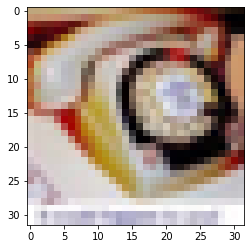

In [ ]:
# Loading the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Plotting an image from the training set
plt.imshow(x_train[5], cmap='gray')

# Printing the shapes of the training and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Label of selected image: [51]


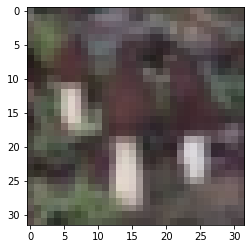

In [ ]:
# Visualizing an image from the training set
plt.imshow(x_train[586], cmap='gray')

# Printing the label of the selected image
print("Label of selected image:", y_train[586])

In [ ]:
# One Hot Encoding the target variables
y_train_OHC = keras.utils.np_utils.to_categorical(y_train, 100)
y_test_OHC = keras.utils.np_utils.to_categorical(y_test, 100)

**The last element of data preprocessing is their normalization.**

In [ ]:
# Normalizing the input data
x_train_final = x_train / 255
x_test_final = x_test / 255

# CNN

# M1

The model starts with a 2D convolutional layer (Conv2D) with 32 filters, a kernel size of (7, 7), strides of (2, 2), and "same" padding. The activation function used is ReLU (rectified linear unit). The input_shape argument specifies that the input data is 32x32 pixels with 3 channels (RGB)

The model then goes through a series of other Conv2D layers, each with more filters and kernel size with (5, 5) and (3, 3) with same strides and padding.

Between these convolutional layers, there are MaxPooling2D layers with pool size of (3,3) and strides of (2,2) that reduces the spatial dimensions of the output from the convolutional layer by taking the maximum value of each window of (3,3) pixels.

The feature maps from these layers are then flattened, and passed through a series of fully connected layers with 512, 128 and 64 neurons, respectively. The final layer is a fully connected layer with 100 neurons and 'softmax' activation function.

The parameters are:

x: The normalized training data.
y: The one-hot encoded labels for the training data.

shuffle: This parameter is set to True, which shuffles the data before each epoch.

epochs: The number of times the model will cycle through the data.

batch_size: The number of samples per gradient update.

validation_data: The data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.

callbacks : is an EarlyStopping callbacks which stop the training if the performance is not improving over 'patience' number of epochs.

In [ ]:
# Initializing the model 1
model = Sequential()

# Adding the first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(32, 32, 3)))
# Adding the first max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Adding the second convolutional layer
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# Adding the third convolutional layer
model.add(Conv2D(64, (2, 2), strides=(1, 1), padding='same', activation='relu'))
# Adding the second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Adding the fourth convolutional layer
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# Adding the fifth convolutional layer
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# Adding the third max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Adding the sixth convolutional layer
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# Adding the fourth max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Flattening the output from the convolutional layers
model.add(Flatten())

# Adding fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Adding the final output layer
model.add(Dense(100, activation='softmax'))

# Model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 64)          16448     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 128)        

In [ ]:
# Compiling the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


In [ ]:
# Training the model
result = model.fit(
    x=x_train_final, y=y_train_OHC, 
    shuffle=True, epochs=30, batch_size=32, 
    validation_data=(x_test_final, y_test_OHC),
    callbacks=[
        EarlyStopping(monitor='val_accuracy', patience=8)
    ]
)

Epoch 1/30
1563/1563 [==============================] - 145s 92ms/step - loss: 4.6059 - accuracy: 0.0083 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/30
1563/1563 [==============================] - 141s 90ms/step - loss: 4.6059 - accuracy: 0.0092 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/30
1563/1563 [==============================] - 139s 89ms/step - loss: 4.6059 - accuracy: 0.0084 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/30
1563/1563 [==============================] - 139s 89ms/step - loss: 4.6059 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 5/30
1563/1563 [==============================] - 139s 89ms/step - loss: 4.6059 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 6/30
1563/1563 [==============================] - 138s 89ms/step - loss: 4.6059 - accuracy: 0.0083 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 7/30
1563/1563 [==============================] - 139s 89ms/step - loss: 4.6059 - accuracy: 0.0083 - val_loss: 4

In [ ]:
predictions = model.predict(x_test_final)
print("Predictions shape: ", predictions.shape)


313/313 [==============================] - 5s 17ms/step
Predictions shape:  (10000, 100)


In [ ]:
predictions = model.predict(x_test_final)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 5s 17ms/step


# Results (the performance metrics of each classifier (TP, TN, FP, FN) M1

In [ ]:
predictions = model.predict(x_test_final)
predicted_labels = np.argmax(predictions, axis=1)

# Print evaluation metrics
print("Confusion Matrix: \n", confusion_matrix(y_test, predicted_labels))
print("\nClassification Report: \n", classification_report(y_test, predicted_labels))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predicted_labels) * 100))


313/313 [==============================] - 5s 17ms/step
Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


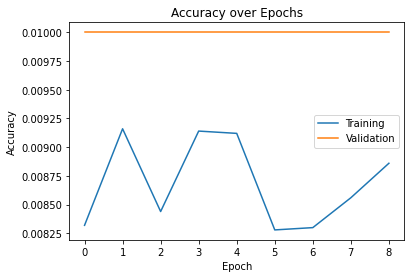

In [ ]:
plt.plot(result.history['accuracy'], label='Training')
plt.plot(result.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

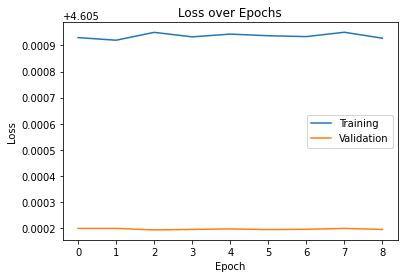

In [ ]:
plt.plot(result.history['loss'], label='Training')
plt.plot(result.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# M2

In [ ]:
# Initializing the model
model2 = Sequential()

# Adding the first convolutional layer
model2.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(32, 32, 3)))
# Adding the first max pooling layer
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Adding the dropout layer to prevent overfitting
model2.add(Dropout(0.25))

# Adding the second convolutional layer
model2.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# Adding the third convolutional layer
model2.add(Conv2D(64, (2, 2), strides=(1, 1), padding='same', activation='relu'))
# Adding the second max pooling layer

model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#reduce the dimensions of the output from (None, 4, 4, 100) to (None, 100) and make it compatible with your final dense layer.
model2.add(GlobalAveragePooling2D())
model2.add(Dense(100, activation='softmax'))
# Adding the dropout layer to prevent overfitting
model2.add(Dropout(0.25))

In [ ]:
print(model2.output.shape)

(None, 100)


In [ ]:
# Compiling the model
model2.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


In [ ]:
# Training the model
result = model2.fit(
    x=x_train_final, y=y_train_OHC, 
    shuffle=True, epochs=40, batch_size=32, 
    validation_data=(x_test_final, y_test_OHC),
    callbacks=[
        EarlyStopping(monitor='val_accuracy', patience=8)
    ]
)

Epoch 1/40
1563/1563 [==============================] - 49s 31ms/step - loss: 6.9714 - accuracy: 0.0527 - val_loss: 3.8937 - val_accuracy: 0.0989
Epoch 2/40
1563/1563 [==============================] - 48s 31ms/step - loss: 6.6637 - accuracy: 0.1061 - val_loss: 3.5894 - val_accuracy: 0.1512
Epoch 3/40
1563/1563 [==============================] - 45s 29ms/step - loss: 6.4767 - accuracy: 0.1414 - val_loss: 3.4021 - val_accuracy: 0.1840
Epoch 4/40
1563/1563 [==============================] - 46s 29ms/step - loss: 6.2937 - accuracy: 0.1659 - val_loss: 3.3235 - val_accuracy: 0.2065
Epoch 5/40
1563/1563 [==============================] - 44s 28ms/step - loss: 6.3012 - accuracy: 0.1811 - val_loss: 3.2192 - val_accuracy: 0.2180
Epoch 6/40
1563/1563 [==============================] - 44s 28ms/step - loss: 6.2368 - accuracy: 0.1954 - val_loss: 3.1040 - val_accuracy: 0.2485
Epoch 7/40
1563/1563 [==============================] - 45s 29ms/step - loss: 6.1402 - accuracy: 0.2064 - val_loss: 3.0489 -

In [ ]:
predictions = model2.predict(x_test_final)
print("Predictions shape: ", predictions.shape)


313/313 [==============================] - 3s 8ms/step
Predictions shape:  (10000, 100)


#Results (the performance metrics of each classifier (TP, TN, FP, FN) M2



In [ ]:
predictions = model2.predict(x_test_final)
predicted_labels = np.argmax(predictions, axis=1)

# Print evaluation metrics
print("Confusion Matrix: \n", confusion_matrix(y_test, predicted_labels))
print("\nClassification Report: \n", classification_report(y_test, predicted_labels))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, predicted_labels) * 100))


313/313 [==============================] - 3s 8ms/step
Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.01      0.66      0.02       100
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


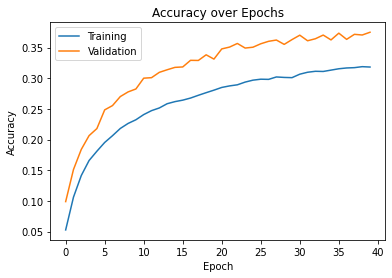

In [ ]:
plt.plot(result.history['accuracy'], label='Training')
plt.plot(result.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

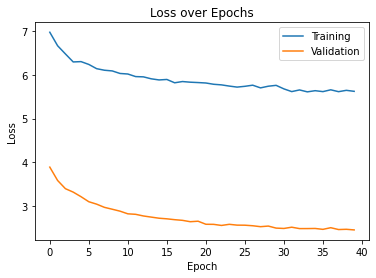

In [ ]:
plt.plot(result.history['loss'], label='Training')
plt.plot(result.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()